# CLASS SESSION GROUP ASSIGNMENT

> Use the provided dataset ([Social_Media_Usage.csv](Social_Media_Usage.csv)) which classifies the social media platforms used by males and females of different ages
> 
> Generate a machine learning model to predict platforms used by a 21yr old female and a 32yr old male.

#### Group 2 Members:
1. Kasasira Joshua
2. Racheal Econia
3. Nampijja Betty 
4. Nantaba Ziria Phionah 
5. Charles Jovans Galiwango
6. Daniel Ongom

### Import libraries

In [23]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

%matplotlib inline

### Read dataset and get information from data

In [24]:
# Load the dataset
df = pd.read_csv("Social_Media_Usage.csv")

In [25]:
## Check the variable Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       18 non-null     int64 
 1   gender    18 non-null     object
 2   platform  18 non-null     object
dtypes: int64(1), object(2)
memory usage: 564.0+ bytes


In [26]:
## Check the variable Datatypes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,18.0,28.055556,5.307843,20.0,25.0,28.0,31.0,37.0


In [27]:
# Check for missing values
missing_info = df.isnull().sum()
missing_info

age         0
gender      0
platform    0
dtype: int64

### Encode the dataset

In [28]:
def encode_dataset(dataset):
  encoded_dataset = dataset
  
  # Encode categorical variables
  for column in dataset.select_dtypes(include=['object']).columns:
      encoded_dataset[column] = dataset[column].astype('category').cat.codes
      
  return encoded_dataset

In [39]:
# Encode the dataset
encoded_df = encode_dataset(df)
encoded_df

,age,gender,platform
0,20,0,2
1,23,0,2
2,25,0,2
3,26,0,1
4,29,0,1
5,30,0,1
6,31,0,3
7,33,0,3
8,37,0,3
9,20,1,2


### Splitting Dataset

In [30]:
X = encoded_df.drop('platform', axis=1) # Features (independent variables)
y = encoded_df['platform'] # Target variable (dependent variable)

# # Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create the model

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y.unique()

array([2, 1, 3, 0], dtype=int8)

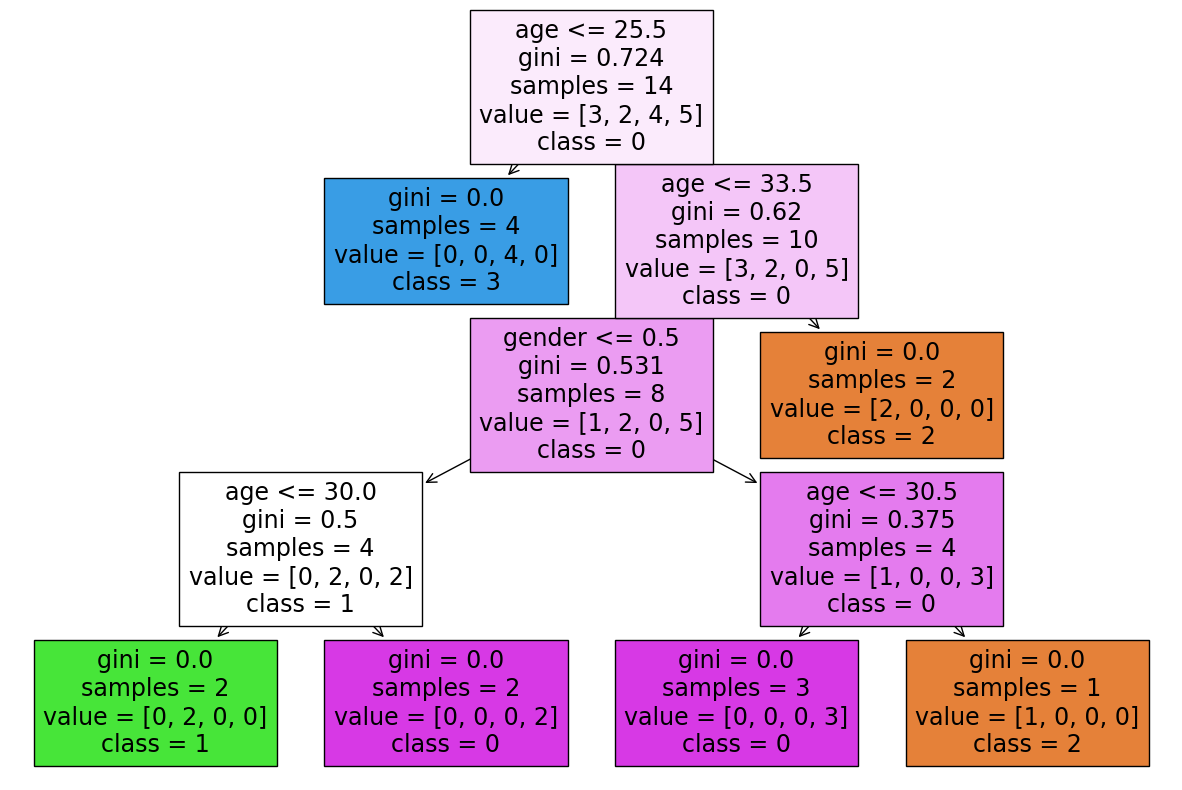

In [52]:
# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, class_names= y.unique().astype(str).tolist(), filled=True)
plt.show()

In [ ]:
def map_back_to_labels(predictions):
  # Label Mapping
  label_mapping = {0: 'facebook', 1: 'snapchat', 2: 'tiktok', 3: 'twitter', }

  # Map the integer predictions to platform names
  interpreted_predictions = [label_mapping[label] for label in predictions]
  
  return interpreted_predictions

In [ ]:
predictions = model.predict(X_test)
predictions

print(map_back_to_labels(predictions))

['tiktok', 'tiktok', 'facebook', 'snapchat']


### Model Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.75


### Predict platforms used by a 21yr old female and a 32yr old male.

In [ ]:
female_21_predictions = model.predict([[21, 0]])
male_32_predictions = model.predict([[32, 1]])

# Display the predictions
print("21yr old female will likely use:", map_back_to_labels(female_21_predictions))
print("32yr old male will likely use:", map_back_to_labels(male_32_predictions))
print("\n\n")

21yr old female will likely use: ['tiktok']
32yr old male will likely use: ['facebook']





C:\Users\joshk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\joshk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
